In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_digits()
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X = data['data']
y = data['target']
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=42)
print(xte)
print(yte)


[[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  9. ...  9.  0.  0.]
 [ 0.  0.  3. ...  5.  0.  0.]]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1

In [5]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
n = 1797
d = 64

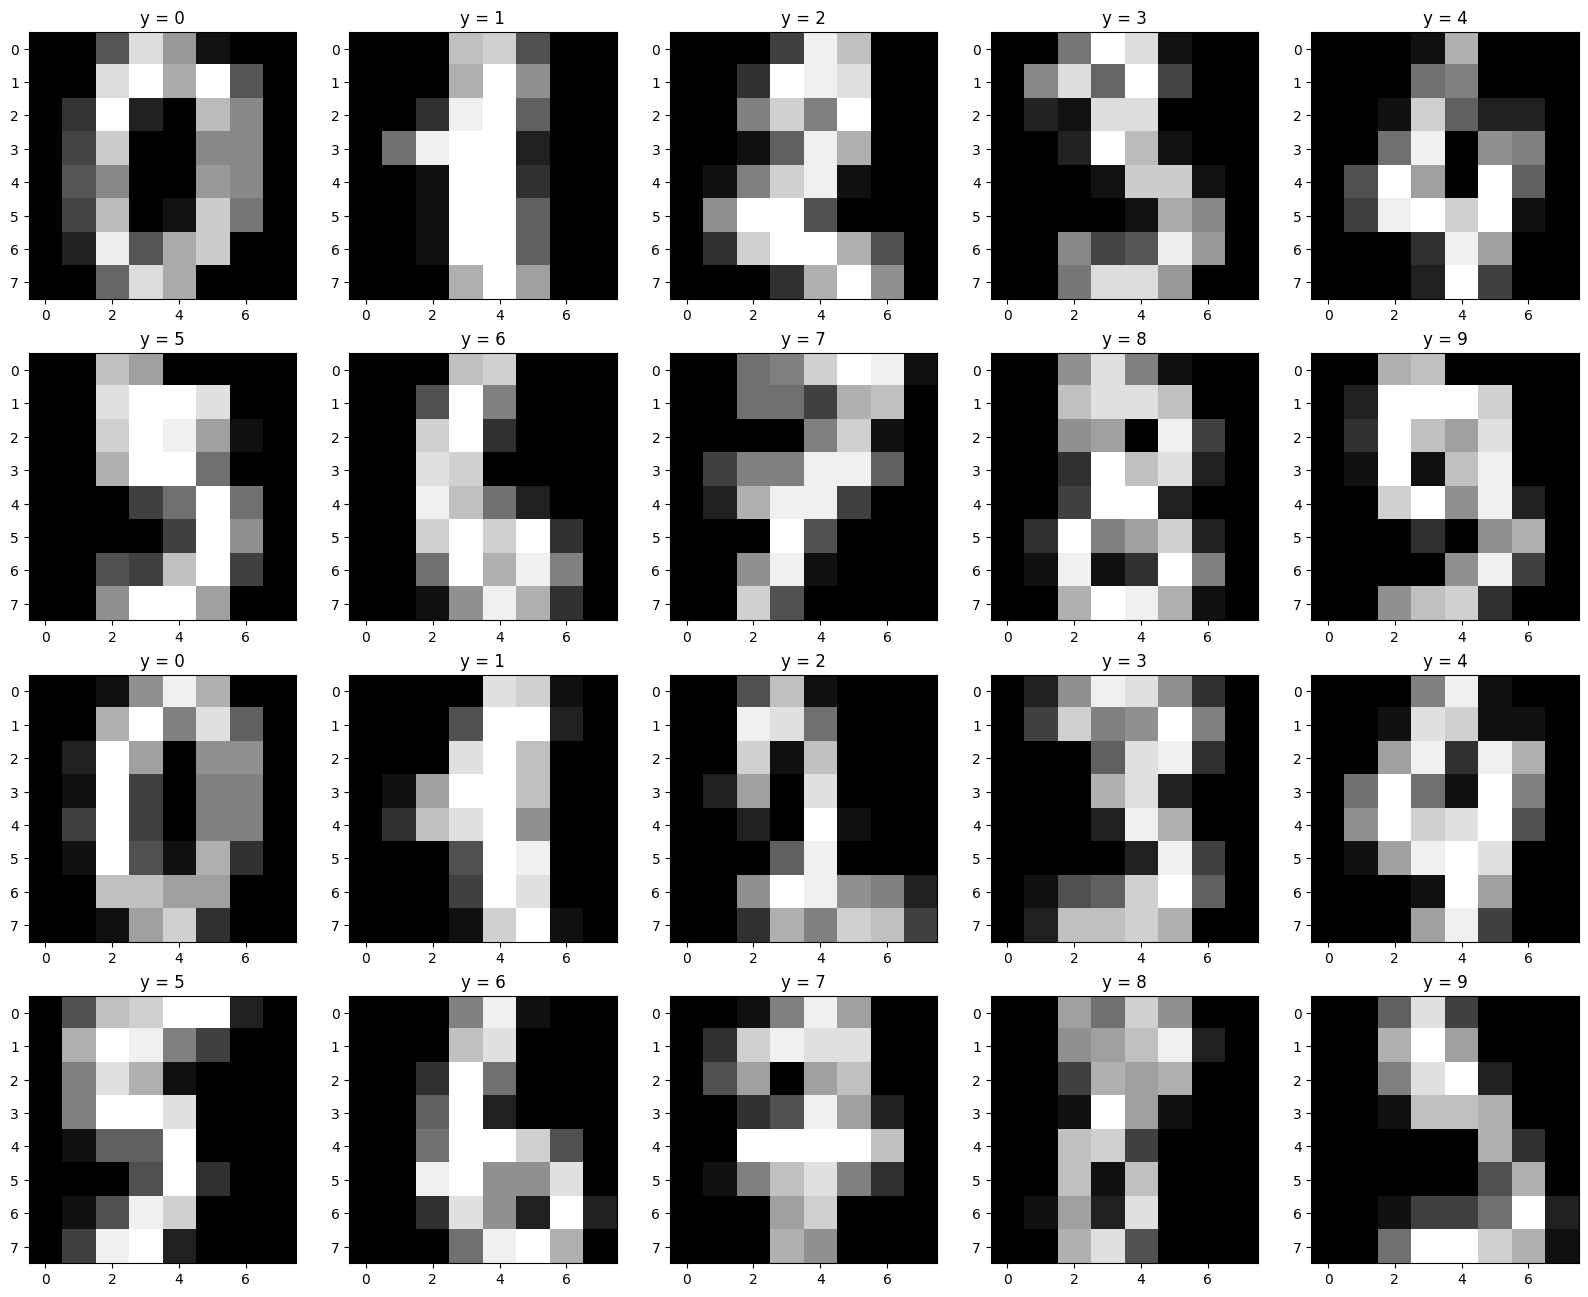

In [7]:
def draw_sample_label(X: np.ndarray , y: np.ndarray, size: int = 20, yred: np.ndarray = None):
    row = size // 5 if size % 5 == 0 else size // 5 + 1
    plt.subplots(row, 5, figsize=(20, 16))
    for i in range(size):
        plt.subplot(row, 5, i + 1)
        plt.imshow(X[i].reshape(8, 8), cmap='gray')
        if yred is None:
            plt.title(f'y = {y[i]}')
        else:
            plt.title(f'y = {y[i]}; yred = {yred[i]}')

draw_sample_label(X, y)

In [8]:
clf = LogisticRegression(max_iter=10000)
clf.fit(xtr, ytr)

Final weights: w = [0.00000000e+00 4.59299990e+05 8.27069996e+06 1.87131000e+07
 1.92420000e+07 1.01712000e+07 2.85659996e+06 3.39299996e+05
 7.79999985e+03 3.14789994e+06 1.68309002e+07 1.87425001e+07
 1.53051002e+07 1.34018999e+07 3.83249994e+06 2.87999996e+05
 4.49999988e+03 3.87329992e+06 1.59270002e+07 1.07841003e+07
 1.03659003e+07 1.31583002e+07 3.22649995e+06 9.29999986e+04
 1.49999995e+03 3.17160005e+06 1.46163002e+07 1.57203002e+07
 1.70547002e+07 1.30827001e+07 3.51539993e+06 2.39999995e+03
 0.00000000e+00 2.82840005e+06 1.22124003e+07 1.64655002e+07
 1.75725002e+07 1.45686001e+07 4.32689992e+06 0.00000000e+00
 1.79999996e+04 2.12370004e+06 1.04106002e+07 1.18497003e+07
 1.23990002e+07 1.31715000e+07 5.75459990e+06 7.25999990e+04
 1.25999997e+04 1.10939998e+06 1.12719001e+07 1.44426002e+07
 1.31538002e+07 1.27731000e+07 6.11999989e+06 2.56799994e+05
 5.99999975e+02 4.01700021e+05 8.90520004e+06 1.90275000e+07
 1.79091000e+07 1.03652999e+07 2.90729994e+06 2.42099989e+05], w_0

In [9]:
ypred = clf.predict(xte)

In [10]:
print(f"error rate: {(yte!=ypred).sum() / len(yte) * 100} %")

error rate: 100.0 %


In [11]:
mask = yte != ypred
draw_sample_label(xte[mask], yte[mask], size = len(xte[mask]), yred=ypred[mask])

IndexError: invalid index to scalar variable.